In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

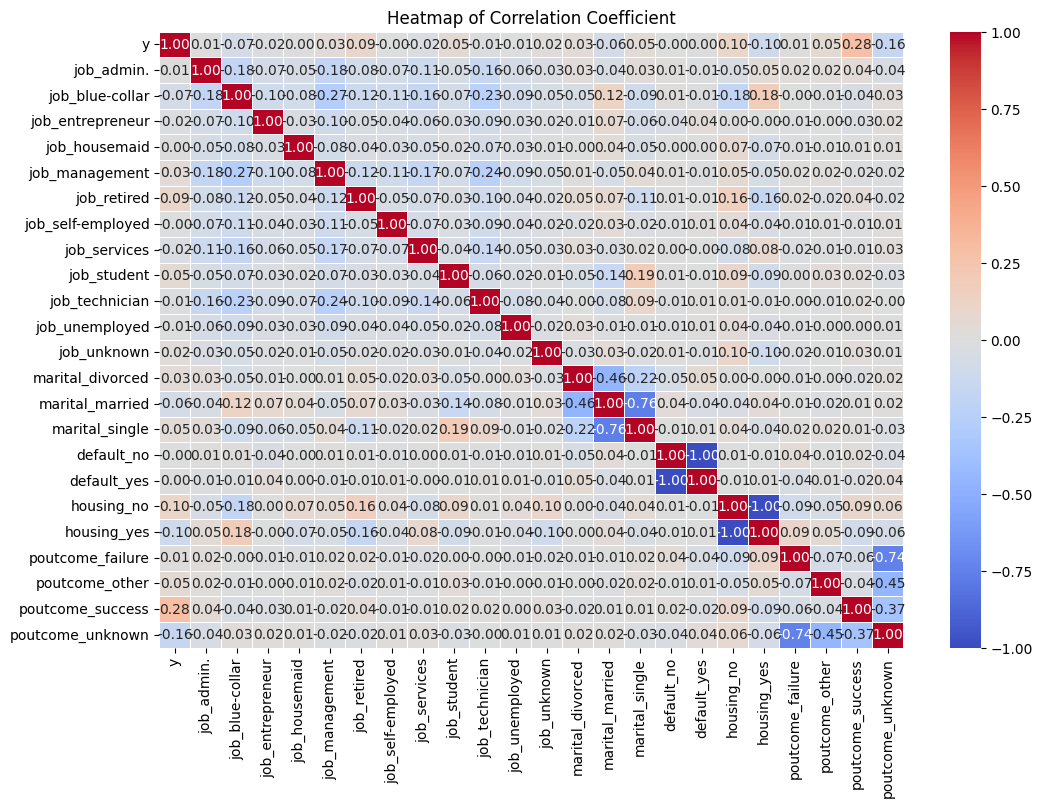

Confusion matrix: [[997   9]
 [106  19]]
Accuracy Score: 0.8983200707338639


In [9]:
# Step 1: Read csv
df = pd.read_csv('/content/sample_data/bank.csv', delimiter=';')

# Step 2: select specific columns for df2
df2 = df[['y','job','marital','default','housing','poutcome']]

# Step3: now converting categorical variable to dummy numerical variable
df3 = pd.get_dummies(df2, columns=['job','marital','default','housing','poutcome'])

# convert target variable y to binary (yes=1, no=0)
df3['y'] = df3['y'].map({'yes':1, 'no':0})

# Step 4: heat map of correlation coefficient for all variables
plt.figure(figsize=(12,8))
sns.heatmap(df3.corr(),annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Coefficient')
plt.show()

"""
Findings from the heatmap:
- The target variable 'y' shows some correlation with 'poutcome_success', suggesting past successful campaigns impact future subscriptions.
- The variable 'housing_no' has some correlation with 'default_no', indicating some dependency.
- Most features have low correlation with each other, meaning the dataset does not have severe multicollinearity issues.
"""

# Step 5: Define target variable and independent variable
y = df3['y']
X = df3.drop(columns=['y'])

# Step 6: Split the datasets into training set (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 7: Train a logistic regression model and predict on test sets
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Step 8: print confusion matrix and accuracy score
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print(f'Confusion matrix: {conf_matrix_log}')

accuracy_score_log = accuracy_score(y_test, y_pred_log)
print(f'Accuracy Score: {accuracy_score_log}')

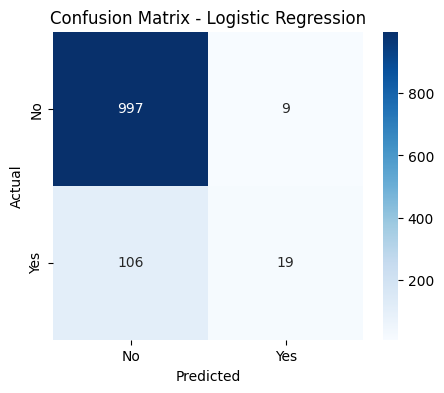

In [10]:
# Heatmap for Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_log, annot=True, cmap='Blues', fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Confusion matrix KNN: [[971  35]
 [110  15]]
Accuracy Score KNN: 0.8717948717948718


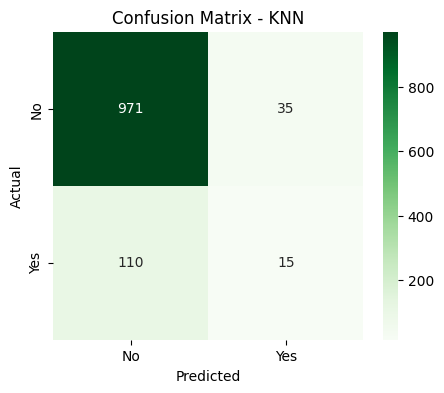

In [11]:
# Step 9: Train and predict using K-Nearest Neighbours (K=3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Confusion matrix and accuracy score for Knn
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f'Confusion matrix KNN: {conf_matrix_knn}')

accuracy_score_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy Score KNN: {accuracy_score_knn}')

# Heatmap for Confusion matrix for KNN
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Greens', fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

In [12]:
# Step 10: Compare Results
print('\nComparision between Models: ')
print(f'Logistic Regression Accuracy: {accuracy_score_log:.4f}')
print(f'KNN Accuracy(K=3): {accuracy_score_knn:.4f}')

"""
Findings:
- Logistic Regression performed better with a higher accuracy compared to KNN.
- KNN accuracy is slightly lower, likely due to its sensitivity to high-dimensional categorical data.
- Logistic Regression is computationally more efficient than KNN, especially with many features.
- KNN performance might improve by tuning the hyperparameter 'k' using cross-validation.
"""


Comparision between Models: 
Logistic Regression Accuracy: 0.8983
KNN Accuracy(K=3): 0.8718


"\nFindings:\n- Logistic Regression performed better with a higher accuracy compared to KNN.\n- KNN accuracy is slightly lower, likely due to its sensitivity to high-dimensional categorical data.\n- Logistic Regression is computationally more efficient than KNN, especially with many features.\n- KNN performance might improve by tuning the hyperparameter 'k' using cross-validation.\n"